<h2><a href="https://leetcode.com/problems/pacific-atlantic-water-flow">417. Pacific Atlantic Water Flow</a></h2><h3>Medium</h3><hr><p>There is an <code>m x n</code> rectangular island that borders both the <strong>Pacific Ocean</strong> and <strong>Atlantic Ocean</strong>. The <strong>Pacific Ocean</strong> touches the island&#39;s left and top edges, and the <strong>Atlantic Ocean</strong> touches the island&#39;s right and bottom edges.</p>

<p>The island is partitioned into a grid of square cells. You are given an <code>m x n</code> integer matrix <code>heights</code> where <code>heights[r][c]</code> represents the <strong>height above sea level</strong> of the cell at coordinate <code>(r, c)</code>.</p>

<p>The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell&#39;s height is <strong>less than or equal to</strong> the current cell&#39;s height. Water can flow from any cell adjacent to an ocean into the ocean.</p>

<p>Return <em>a <strong>2D list</strong> of grid coordinates </em><code>result</code><em> where </em><code>result[i] = [r<sub>i</sub>, c<sub>i</sub>]</code><em> denotes that rain water can flow from cell </em><code>(r<sub>i</sub>, c<sub>i</sub>)</code><em> to <strong>both</strong> the Pacific and Atlantic oceans</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/06/08/waterflow-grid.jpg" style="width: 400px; height: 400px;" />
<pre>
<strong>Input:</strong> heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
<strong>Output:</strong> [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
<strong>Explanation:</strong> The following cells can flow to the Pacific and Atlantic oceans, as shown below:
[0,4]: [0,4] -&gt; Pacific Ocean 
&nbsp;      [0,4] -&gt; Atlantic Ocean
[1,3]: [1,3] -&gt; [0,3] -&gt; Pacific Ocean 
&nbsp;      [1,3] -&gt; [1,4] -&gt; Atlantic Ocean
[1,4]: [1,4] -&gt; [1,3] -&gt; [0,3] -&gt; Pacific Ocean 
&nbsp;      [1,4] -&gt; Atlantic Ocean
[2,2]: [2,2] -&gt; [1,2] -&gt; [0,2] -&gt; Pacific Ocean 
&nbsp;      [2,2] -&gt; [2,3] -&gt; [2,4] -&gt; Atlantic Ocean
[3,0]: [3,0] -&gt; Pacific Ocean 
&nbsp;      [3,0] -&gt; [4,0] -&gt; Atlantic Ocean
[3,1]: [3,1] -&gt; [3,0] -&gt; Pacific Ocean 
&nbsp;      [3,1] -&gt; [4,1] -&gt; Atlantic Ocean
[4,0]: [4,0] -&gt; Pacific Ocean 
       [4,0] -&gt; Atlantic Ocean
Note that there are other possible paths for these cells to flow to the Pacific and Atlantic oceans.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> heights = [[1]]
<strong>Output:</strong> [[0,0]]
<strong>Explanation:</strong> The water can flow from the only cell to the Pacific and Atlantic oceans.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>m == heights.length</code></li>
	<li><code>n == heights[r].length</code></li>
	<li><code>1 &lt;= m, n &lt;= 200</code></li>
	<li><code>0 &lt;= heights[r][c] &lt;= 10<sup>5</sup></code></li>
</ul>


## DFS Approach
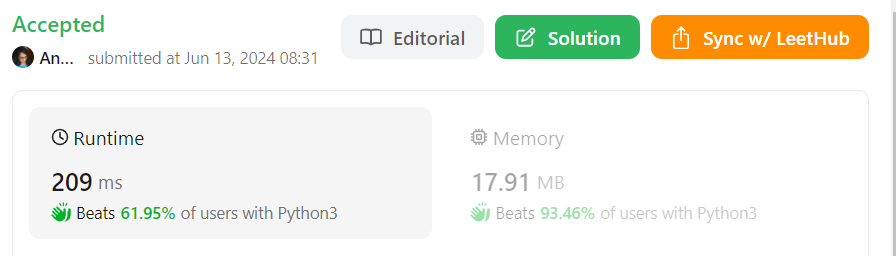

In [1]:
from typing import List

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        rows, cols = len(heights), len(heights[0])
        pac, atl = set(), set()
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]

        def dfs(x, y, grid, vis, prev):
            vis.add((x, y))

            for dx, dy in directions:   # Get coord if valid , not visited and gt or equal to prev cell (since we are going from pac to internal grids)
                if 0 <= x + dx < rows and 0 <= y + dy < cols and (x+dx, y+dy) not in vis and grid[x+dx][y+dy] >= prev:
                    dfs(x + dx, y + dy, grid, vis, grid[x+dx][y+dy])


        for c in range(cols):
            dfs(0, c, heights, pac, heights[0][c])   # Along pacififc
            dfs(rows -1, c, heights, atl, heights[rows -1][c])   # Along atlantic

        for r in range(rows):
            dfs(r, 0, heights, pac, heights[r][0])  # Along pacific
            dfs(r, cols -1, heights, atl, heights[r][cols -1])  # Along atlantic

        return pac.intersection(atl)